In [1]:
import os, sys
path_to_package = os.path.abspath(os.path.join('../../..'))
if path_to_package not in sys.path:
    sys.path.append(path_to_package)


from src.io import get_filepaths, read_phylip_file
from src.models import data_preparation
from src.utils import get_filename

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

In [2]:
chromosome = "---"

original_fps = get_filepaths('/home/khaldrem/code/sc_regmod/dataset/original')
clean_fps = get_filepaths('/home/khaldrem/code/sc_regmod/dataset/clean')
anova_fps_exp_1 = get_filepaths(f"/home/khaldrem/code/sc_regmod/dataset/anova/anova_at_least_one_phenotype/p_value_0_01/{chromosome}")

In [3]:
print(f"Cantidad de archivos proceso 2 - exp 4: {len(anova_fps_exp_1)}")

Cantidad de archivos proceso 2 - exp 4: 5934


In [4]:
df_files = {}

filenames = []
original_length = []
clean_length = []
anova_length = []

for f in original_fps:
    data = read_phylip_file(f)
    filename = get_filename(f)

    filenames.append(filename)
    original_length.append(data.get_alignment_length())

    clean_path = f"/home/khaldrem/code/sc_regmod/dataset/clean/{filename}.phylip"
    if os.path.exists(clean_path):
        data2 = read_phylip_file(clean_path)
        clean_length.append(data2.get_alignment_length())
    else:
        clean_length.append(-1)

    anova_path = f"/home/khaldrem/code/sc_regmod/dataset/anova/anova_at_least_one_phenotype/p_value_0_01/{chromosome}/{filename}.phylip"
    if os.path.exists(anova_path):
        data3 = read_phylip_file(anova_path)
        anova_length.append(data3.get_alignment_length())
    else:
        anova_length.append(-1)


df_files["filenames"] = filenames
df_files["Original"] = original_length
df_files["Proceso_1"] = clean_length
df_files["Proceso_2"] = anova_length

df_len = pd.DataFrame.from_dict(df_files)

In [5]:
df_len.head()

,filenames,Original,Proceso_1,Proceso_2
0,YNR029C,1290,161,33
1,YOR059C,1353,176,23
2,YJR062C,1375,194,29
3,YJL123C,1565,363,61
4,YJL203W,843,122,27


In [6]:
df_len.loc[df_len['Proceso_2']!= -1, 'percentage'] = 1 - (df_len["Proceso_2"]/df_len["Proceso_1"])

In [7]:
print(f"Cantidad de archivos que presentaron un 50% o mas de: {df_len.loc[(df_len['Proceso_2'] != -1) & (df_len['percentage'] >= 0.5)].shape[0]}")

Cantidad de archivos que presentaron un 50% o mas de: 5928


In [8]:
print(f"Cantida de archivos que fueron eliminados: {df_len.loc[(df_len['Proceso_2'] == -1)].shape[0]} (Respecto a la cantidad original)")

Cantida de archivos que fueron eliminados: 81 (Respecto a la cantidad original)


In [9]:
print("Nombres: ")
print(len(df_len.loc[(df_len['Proceso_2'] == -1) & (df_len['Proceso_1'] != -1)]["filenames"].tolist()))
df_len.loc[(df_len['Proceso_2'] == -1) & (df_len['Proceso_1'] != -1)]["filenames"].tolist()

Nombres: 
43


['YOL162W',
 'YHR219W',
 'YHR181W',
 'YOL163W',
 'YHL049C',
 'YGR226C',
 'YER189W',
 'YOR302W',
 'YHR054C',
 'YAR053W',
 'YFL061W',
 'YAR066W',
 'YLR462W',
 'YPL281C',
 'YOL164W',
 'YAL064W',
 'YNL335W',
 'YJL222W',
 'YLL066C',
 'YCL066W',
 'YLR463C',
 'YER190W',
 'YDL245C',
 'YLL064C',
 'YGR242W',
 'YDL247W',
 'YOR393W',
 'YNR076W',
 'YFL066C',
 'YFL064C',
 'YLR204W',
 'YBL112C',
 'YLR161W',
 'YLR162W',
 'YDL184C',
 'YLR075W',
 'YHR055C',
 'YLL067C',
 'YPR052C',
 'YJR159W',
 'YFL058W',
 'YFL065C',
 'YPR204W']

In [10]:
print("Datos proceso 2: ")
print(f"mean: {df_len['Proceso_2'].mean()}")
print(f"std: {df_len['Proceso_2'].std()}")
print(f"var: {df_len['Proceso_2'].var()}")
print()

Datos proceso 2: 
mean: 32.28977556109726
std: 41.23972178224035
var: 1700.7146526765894



In [11]:
df_len.describe()

,Original,Proceso_1,Proceso_2,percentage
count,6015.000000,6015.000000,6015.000000,5934.000000
mean,1468.670158,220.279468,32.289776,0.854949
std,1132.129197,264.945442,41.239722,0.053325
min,78.000000,-1.000000,-1.000000,0.100000
25%,690.000000,93.000000,12.000000,0.829545
50%,1182.000000,159.000000,22.000000,0.859459
75%,1877.000000,270.000000,39.000000,0.887309
max,14737.000000,6609.000000,1071.000000,0.992481


In [12]:
df_len.head()

,filenames,Original,Proceso_1,Proceso_2,percentage
0,YNR029C,1290,161,33,0.795031
1,YOR059C,1353,176,23,0.869318
2,YJR062C,1375,194,29,0.850515
3,YJL123C,1565,363,61,0.831956
4,YJL203W,843,122,27,0.778689


Text(0, 0.5, 'Largo de la secuencia')

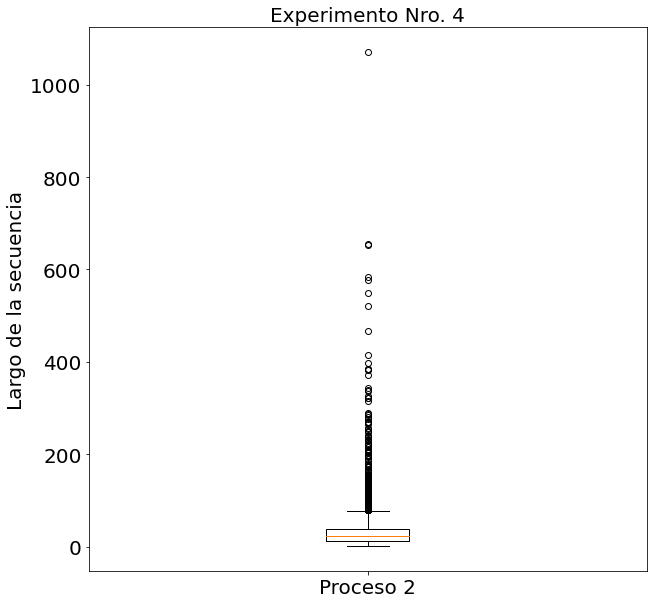

In [14]:
NRO_EXP = 4
proc2 = df_len.loc[df_len["Proceso_2"] != -1]

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(proc2["Proceso_2"])
ax.set_title(f'Experimento Nro. {NRO_EXP}', fontsize=20)

plt.xticks([1], ['Proceso 2'])
plt.ylabel("Largo de la secuencia", fontsize=20)